# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD2030 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Magister en Ciencia de Datos**<br>

# Tutorial 3: Webscraping.

* Este tutorial tiene como objetivo demostrar el proceso de webscraping utilizando las librerías `requests` y `BeautifulSoup`, con fin de extraer datos publicados en páginas web.<br>

* Como referencia, se sugiere revisar la documentación de la librería requests, disponible en el siguiente link:

    https://requests.readthedocs.io/en/latest/

    Y de BeautifulSoup: 

    https://beautiful-soup-4.readthedocs.io/en/latest/


* Para instalar `BeautifulSoup`, puede utilizar los siguientes comandos:

    `pip install BeautifulSoup4`

    o

    `conda install beautifulsoup4`
    

* **Nota:** Este Notebook está disponible como lectura Obligatoria de la semana.




## Ejemplo 1: Extracción de datos de Wikipedia

Wikipedia puede ser una fuente muy interesante de datos, teniendo en consideración siempre la necesidad de verificar las referencias y autoría de la información ahí publicada.

Veamos cómo extraer un conjunto de datos de actualidad mundial: el listado de países clasificados al Mundial de Qatar 2022 (entre los cuales, no está Chile).

Los datos están publicados en la siguiente página:

https://es.wikipedia.org/wiki/Clasificaci%C3%B3n_para_la_Copa_Mundial_de_F%C3%BAtbol_de_2022



In [1]:
#Importar las librerías a utilizar
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [2]:
url='https://es.wikipedia.org/wiki/Clasificaci%C3%B3n_para_la_Copa_Mundial_de_F%C3%BAtbol_de_2022'
page=requests.get(url).text
page

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Clasificación para la Copa Mundial de Fútbol de 2022 - Wikipedia, la enciclopedia libre</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(func

In [3]:
soup=bs(page)
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Clasificación para la Copa Mundial de Fútbol de 2022 - Wikipedia, la enciclopedia libre</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function

Al inspeccionar la página, podemos ver que los datos de países clasificados están encerrados por las etiquetas `<table>`. Dado que es la primera tabla de la página, podemos usar la función `find` para extraerla. Esto nos entrega todo el contenido de la tabla ,incluyendo encabezados `<th>` y filas `<tr>`.



In [4]:
table=soup.find('table',attrs={"class": "wikitable sortable"})
table

<table class="wikitable sortable" style="text-align: center; font-size: 88%;" width="100%">
<tbody><tr>
<th colspan="9" style="background:#AA1C47; color:#FFFFFF;">Copa Mundial de Fútbol de 2022
</th></tr>
<tr>
<th width="5">N.º
</th>
<th width="130">Equipo
</th>
<th width="380">Detalle
</th>
<th class="unsortable" width="200">Fecha de clasificación
</th>
<th width="20"><abbr title="Participaciones en Copas del Mundo">Part.</abbr>
</th>
<th width="20"><abbr title="Participaciones consecutivas en Copas del Mundo">Cons.</abbr>
</th>
<th width="20"><abbr title="Última participación">Última</abbr>
</th>
<th width="350">Mejor presentación
</th>
<th width="20"><a href="/wiki/Clasificaci%C3%B3n_mundial_de_la_FIFA" title="Clasificación mundial de la FIFA"><i>Ranking</i> FIFA</a><sup class="reference separada" id="cite_ref-2"><a href="#cite_note-2"><span class="corchete-llamada">[</span>n. 1<span class="corchete-llamada">]</span></a></sup>​
</th></tr>
<tr>
<th>1
</th>
<td style="text-align:left;

In [5]:
tables=soup.find_all('table')
len(tables)

5

In [6]:
table=tables[0]

In [7]:
table=soup.find('table')
table

<table class="wikitable sortable" style="text-align: center; font-size: 88%;" width="100%">
<tbody><tr>
<th colspan="9" style="background:#AA1C47; color:#FFFFFF;">Copa Mundial de Fútbol de 2022
</th></tr>
<tr>
<th width="5">N.º
</th>
<th width="130">Equipo
</th>
<th width="380">Detalle
</th>
<th class="unsortable" width="200">Fecha de clasificación
</th>
<th width="20"><abbr title="Participaciones en Copas del Mundo">Part.</abbr>
</th>
<th width="20"><abbr title="Participaciones consecutivas en Copas del Mundo">Cons.</abbr>
</th>
<th width="20"><abbr title="Última participación">Última</abbr>
</th>
<th width="350">Mejor presentación
</th>
<th width="20"><a href="/wiki/Clasificaci%C3%B3n_mundial_de_la_FIFA" title="Clasificación mundial de la FIFA"><i>Ranking</i> FIFA</a><sup class="reference separada" id="cite_ref-2"><a href="#cite_note-2"><span class="corchete-llamada">[</span>n. 1<span class="corchete-llamada">]</span></a></sup>​
</th></tr>
<tr>
<th>1
</th>
<td style="text-align:left;

In [8]:
rows=table.find_all('tr')
len(rows)

34

In [9]:
cols=rows[2].find_all('td')
cols

[<td style="text-align:left;"><span style="display:none;">QAT</span><span class="flagicon"><a class="image" href="/wiki/Archivo:Flag_of_Qatar.svg" title="Bandera de Catar"><img alt="Bandera de Catar" class="thumbborder" data-file-height="550" data-file-width="1400" decoding="async" height="8" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Qatar.svg/20px-Flag_of_Qatar.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Qatar.svg/30px-Flag_of_Qatar.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Qatar.svg/40px-Flag_of_Qatar.svg.png 2x" width="20"/></a></span> <a href="/wiki/Selecci%C3%B3n_de_f%C3%BAtbol_de_Catar" title="Selección de fútbol de Catar">Catar</a>
 </td>,
 <td>Anfitrión
 </td>,
 <td>2 de diciembre de 2010
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td><i>Debut</i>
 </td>,
 <td><i>Sin participaciones previas</i>
 </td>,
 <td>113.°
 </td>]

In [10]:
cols[0].text

'QAT\xa0Catar\n'

In [11]:
#creamos un DataFrame vacío
df=pd.DataFrame(columns = ['Equipo','Detalle','FechaClasificacion','Part','Cons','Ultima','Mejor','Ranking'])


#iterar sobre cada fila ('tr')
for row in rows[2::]:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    equipo=cols[0]
    detalle=cols[1]
    fecha=cols[2]
    part=cols[3]
    cons=cols[4]
    ultima=cols[5]
    mejor=cols[6]
    rank=cols[7]
    df=df.append({'Equipo':equipo,'Detalle':detalle,'FechaClasificacion':fecha,
                  'Part':part,'Cons':cons,'Ultima':ultima,'Mejor':mejor,'Ranking':rank}, ignore_index=True)
        
df      

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_24786/3425329605.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'Equipo':equipo,'Detalle':detalle,'FechaClasificacion':fecha,
/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_24786/3425329605.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'Equipo':equipo,'Detalle':detalle,'FechaClasificacion':fecha,
/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_24786/3425329605.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'Equipo':equipo,'Detalle':detalle,'FechaClasificacion':fecha,
/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_24786/3425329605.py:17: FutureWarning: The frame.append met

,Equipo,Detalle,FechaClasificacion,Part,Cons,Ultima,Mejor,Ranking
0,QAT Catar,Anfitrión,2 de diciembre de 2010,1,1,Debut,Sin participaciones previas,113.°
1,GER Alemania,1.° del Grupo J de la UEFA,11 de octubre de 2021,20,18,2018,"Campeón (1954, 1974, 1990, 2014)",14.°
2,DEN Dinamarca,1.° del Grupo F de la UEFA,12 de octubre de 2021,6,2,2018,Cuartos de final (1998),10.°
3,BRA Brasil,1.° puesto de la Conmebol,11 de noviembre de 2021,22,22,2018,"Campeón (1958, 1962, 1970, 1994, 2002)",2.°
4,BEL Bélgica,1.° del Grupo E de la UEFA,13 de noviembre de 2021,14,3,2018,Tercer puesto (2018),1.°
5,FRA Francia,1.° del Grupo D de la UEFA,13 de noviembre de 2021,16,7,2018,"Campeón (1998, 2018)",3.°
6,CRO Croacia,1.° del Grupo H de la UEFA,14 de noviembre de 2021,6,3,2018,Subcampeón (2018),18.°
7,ESP España,1.° del Grupo B de la UEFA,14 de noviembre de 2021,16,12,2018,Campeón (2010),7.°
8,SRB Serbia,1.° del Grupo A de la UEFA,14 de noviembre de 2021,13[n. 2]​,2,2018,"Cuarto puesto (1930, 1962)[n. 3]​",25.°
9,ENG Inglaterra,1.° del Grupo I de la UEFA,15 de noviembre de 2021,16,7,2018,Campeón (1966),5.°


###  Ejercicio de práctica: 
Repita el ejercicio, ahora para extraer los datos relativos a países productores de café, publicados en la página https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_producci%C3%B3n_de_caf%C3%A9

## Ejemplo 2: Información de productos en una tienda

En este ejemplo usaremos una página de venta de libros ficticia, para extraer la información de todos los productos en la página: http://books.toscrape.com/

El objetivo es generar un DataFrame con las siguientes columnas para cada libro:
* Nombre del libro (book title)
* Precio (price)
* Disponibilidad (availability)
* Categoría (category)
    
Al inspeccionar el código HTML de la página web, podemos identificar la siguiente sección con la información de productos:

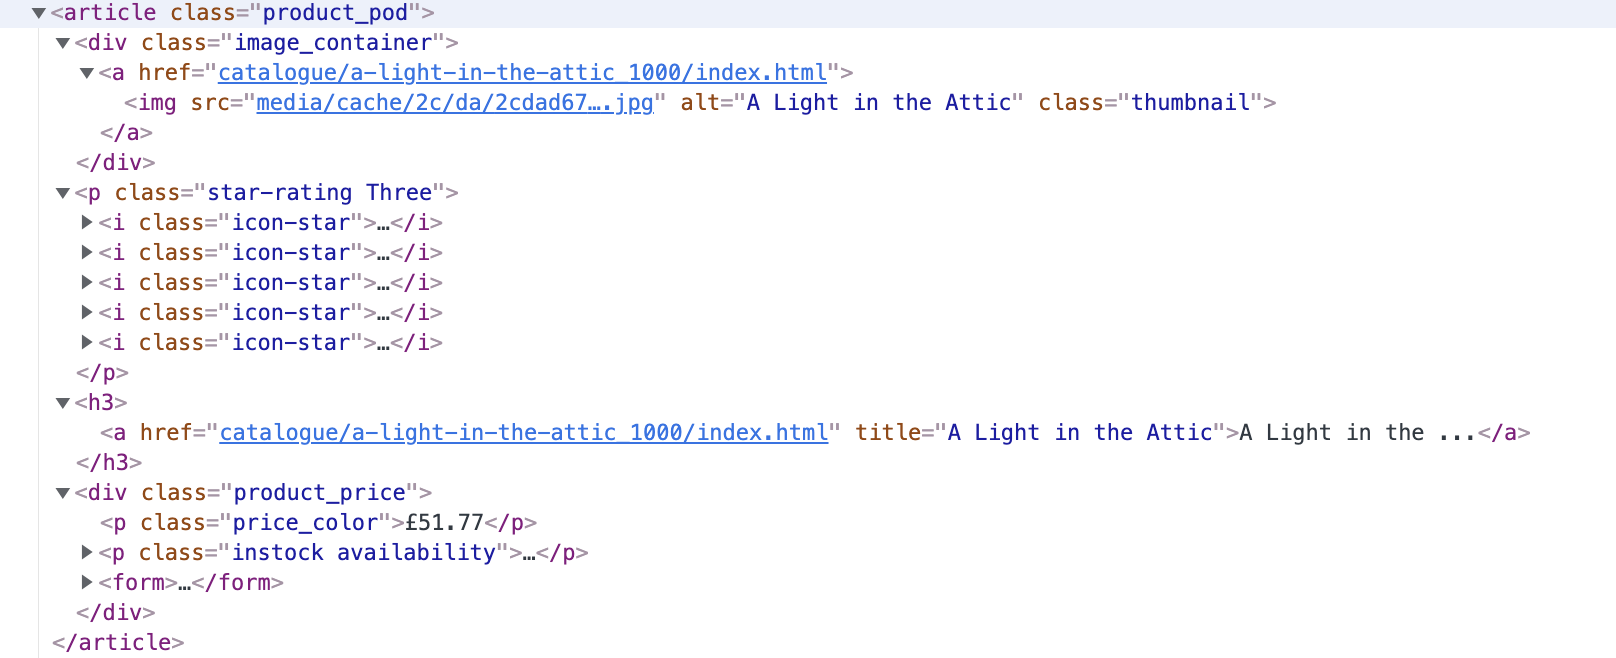

In [37]:
import requests
import pandas as pd
from bs4 import BeautifulSoup 
main_url = "http://books.toscrape.com/"

result = requests.get(main_url)
soup = BeautifulSoup(result.text, 'html.parser')
soup

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [38]:
#inspeccionamos la sopa para llegar a lo que nos interesa: la info de cada producto
lista=soup.find_all("article", class_ = "product_pod")
lista[0].div.a.get('href')

'catalogue/a-light-in-the-attic_1000/index.html'

In [39]:
#para cada artículo, hay una url que lleva a la página con la información detallada del producto
book_url=lista[0].div.a.get('href')
book_url

'catalogue/a-light-in-the-attic_1000/index.html'

In [40]:
#para que sea una url completa, falta agregar la primera parte: "http://books.toscrape.com/
book_url=main_url+book_url
book_url

'http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'

In [41]:
#resumimos los pasos para llegar a la url de cada producto en una función
def getBooksURLs(url):
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    
    lista=soup.findAll("article", class_ = "product_pod")
    
    #notacion de lista:
    book_url_list=[url+'/'+x.div.a.get('href') for x in lista]
    return(book_url_list)


In [42]:
#urls para todos los artículos de la página principal
booksURLs = getBooksURLs('http://books.toscrape.com')
booksURLs

['http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'http://books.toscrape.com/catalogue/soumission_998/index.html',
 'http://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'http://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'http://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'http://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'http://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'http://books.toscrape.com/catalogue/the-black-maria_991/index.html',
 'http://books.toscrape.com/catalogue/starving-hearts-triangular-trade-trilogy-1_990

In [43]:
names = []
prices = []
nb_in_stock = []
categories = []

for url in booksURLs:
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')
    
    # Nombre del producto
    names.append(soup.find("div", class_ = "col-sm-6 product_main").h1.text.strip())
    
    # Precio
    prices.append(soup.find("p", class_ = "price_color")) 
    
    # Disponibilidad
    nb_in_stock.append(soup.find("p", class_ = "instock availability").text) # get rid of non numerical characters
    
    # Categoria
    lines=soup.find("ul",class_='breadcrumb').find_all('li')
    category=lines[2].a.text
    categories.append(category)
   

scraped_data = pd.DataFrame({'name': names, 'price': prices, 'nb_in_stock': nb_in_stock, "product_category": categories})


In [44]:
scraped_data

,name,price,nb_in_stock,product_category
0,A Light in the Attic,[Â£51.77],\n\n \n In stock (22 available)\n \n,Poetry
1,Tipping the Velvet,[Â£53.74],\n\n \n In stock (20 available)\n \n,Historical Fiction
2,Soumission,[Â£50.10],\n\n \n In stock (20 available)\n \n,Fiction
3,Sharp Objects,[Â£47.82],\n\n \n In stock (20 available)\n \n,Mystery
4,Sapiens: A Brief History of Humankind,[Â£54.23],\n\n \n In stock (20 available)\n \n,History
5,The Requiem Red,[Â£22.65],\n\n \n In stock (19 available)\n \n,Young Adult
6,The Dirty Little Secrets of Getting Your Dream...,[Â£33.34],\n\n \n In stock (19 available)\n \n,Business
7,The Coming Woman: A Novel Based on the Life of...,[Â£17.93],\n\n \n In stock (19 available)\n \n,Default
8,The Boys in the Boat: Nine Americans and Their...,[Â£22.60],\n\n \n In stock (19 available)\n \n,Default
9,The Black Maria,[Â£52.15],\n\n \n In stock (19 available)\n \n,Poetry
